In [2]:
%pip install --upgrade pip
%pip install python2verilog==0.1.9

Agent pid 174335
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Agent pid 174344
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import matplotlib.pyplot as plt
import random
import numpy as np
from typing import Optional
from python2verilog import verilogify, context_to_text_and_file

In [4]:
def make_visual(generator_inst, directory: Optional[str] = None):
    """
    Any iterable of tuples where the tuples are of length > 0 will work.
    Visualizes the first 3 elements of each tuple as (x, y, colour)
    """

    # Generate the data using the generator function
    data_triple_list = []

    for idx, yields in enumerate(generator_inst):
        if isinstance(yields, int):
            yields = (yields,)
        if len(yields) >= 3:
            data_triple_list.append(yields[:3])
        elif len(yields) >= 2:
            data_triple_list.append((*yields[:2], 1))
        else:
            data_triple_list.append((yields[0], idx, 1))

    data_triple = np.array(data_triple_list)

    try:
        height = max(data_triple[:, 0])
        width = max(data_triple[:, 1])
        grid = np.zeros((int(height) + 1, int(width) + 1))
        for x_coord, y_coord, colour in data_triple:
            grid[x_coord, y_coord] = colour

        # Create the pixel-like plot
        plt.imshow(grid)

        # Set labels and title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Pixel-like Plot")

        # Add color bar
        cbar = plt.colorbar()
        cbar.set_label("Z")

        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()
        if directory: 
            plt.savefig(directory)

        plt.clf()
        plt.cla()
        plt.close()
        
    except IndexError as e:
        print(
            f"Skipping make_visual for {str(generator_inst)} due to negative outputs {e}",
        )

x: 46, y: 64, radius: 31
[(77, 91), (46, 122), (15, 91), (46, 122), (15, 91), (46, 60), (77, 91), (46, 60), (77, 92), (47, 122), (15, 92), (45, 122), (15, 90), (45, 60), (77, 90), (47, 60), (77, 93), (48, 122), (15, 93), (44, 122), (15, 89), (44, 60), (77, 89), (48, 60), (77, 94), (49, 122), (15, 94), (43, 122), (15, 88), (43, 60), (77, 88), (49, 60), (77, 95), (50, 122), (15, 95), (42, 122), (15, 87), (42, 60), (77, 87), (50, 60), (77, 96), (51, 122), (15, 96), (41, 122), (15, 86), (41, 60), (77, 86), (51, 60), (76, 97), (52, 121), (16, 97), (40, 121), (16, 85), (40, 61), (76, 85), (52, 61), (76, 98), (53, 121), (16, 98), (39, 121), (16, 84), (39, 61), (76, 84), (53, 61), (76, 99), (54, 121), (16, 99), (38, 121), (16, 83), (38, 61), (76, 83), (54, 61), (76, 100), (55, 121), (16, 100), (37, 121), (16, 82), (37, 61), (76, 82), (55, 61), (75, 101), (56, 120), (17, 101), (36, 120), (17, 81), (36, 62), (75, 81), (56, 62), (75, 102), (57, 120), (17, 102), (35, 120), (17, 80), (35, 62), (75,

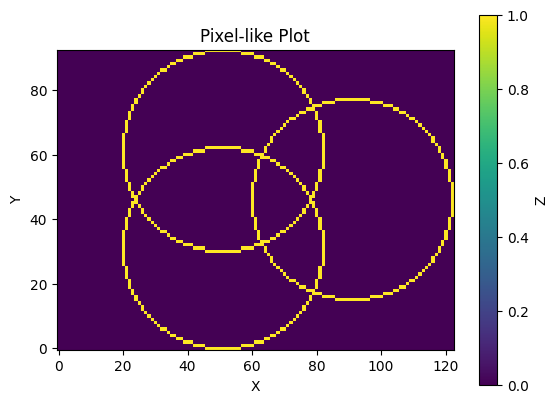

x: 60, y: 30, radius: 36
[(96, 61), (60, 97), (24, 61), (60, 97), (24, 61), (60, 25), (96, 61), (60, 25), (96, 62), (61, 97), (24, 62), (59, 97), (24, 60), (59, 25), (96, 60), (61, 25), (96, 63), (62, 97), (24, 63), (58, 97), (24, 59), (58, 25), (96, 59), (62, 25), (96, 64), (63, 97), (24, 64), (57, 97), (24, 58), (57, 25), (96, 58), (63, 25), (96, 65), (64, 97), (24, 65), (56, 97), (24, 57), (56, 25), (96, 57), (64, 25), (96, 66), (65, 97), (24, 66), (55, 97), (24, 56), (55, 25), (96, 56), (65, 25), (96, 67), (66, 97), (24, 67), (54, 97), (24, 55), (54, 25), (96, 55), (66, 25), (95, 68), (67, 96), (25, 68), (53, 96), (25, 54), (53, 26), (95, 54), (67, 26), (95, 69), (68, 96), (25, 69), (52, 96), (25, 53), (52, 26), (95, 53), (68, 26), (95, 70), (69, 96), (25, 70), (51, 96), (25, 52), (51, 26), (95, 52), (69, 26), (95, 71), (70, 96), (25, 71), (50, 96), (25, 51), (50, 26), (95, 51), (70, 26), (94, 72), (71, 95), (26, 72), (49, 95), (26, 50), (49, 27), (94, 50), (71, 27), (94, 73), (72,

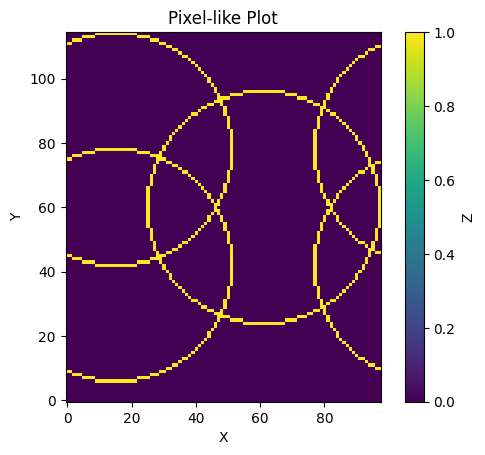

x: 54, y: 77, radius: 31
[(85, 104), (54, 135), (23, 104), (54, 135), (23, 104), (54, 73), (85, 104), (54, 73), (85, 105), (55, 135), (23, 105), (53, 135), (23, 103), (53, 73), (85, 103), (55, 73), (85, 106), (56, 135), (23, 106), (52, 135), (23, 102), (52, 73), (85, 102), (56, 73), (85, 107), (57, 135), (23, 107), (51, 135), (23, 101), (51, 73), (85, 101), (57, 73), (85, 108), (58, 135), (23, 108), (50, 135), (23, 100), (50, 73), (85, 100), (58, 73), (85, 109), (59, 135), (23, 109), (49, 135), (23, 99), (49, 73), (85, 99), (59, 73), (84, 110), (60, 134), (24, 110), (48, 134), (24, 98), (48, 74), (84, 98), (60, 74), (84, 111), (61, 134), (24, 111), (47, 134), (24, 97), (47, 74), (84, 97), (61, 74), (84, 112), (62, 134), (24, 112), (46, 134), (24, 96), (46, 74), (84, 96), (62, 74), (84, 113), (63, 134), (24, 113), (45, 134), (24, 95), (45, 74), (84, 95), (63, 74), (83, 114), (64, 133), (25, 114), (44, 133), (25, 94), (44, 75), (83, 94), (64, 75), (83, 115), (65, 133), (25, 115), (43, 13

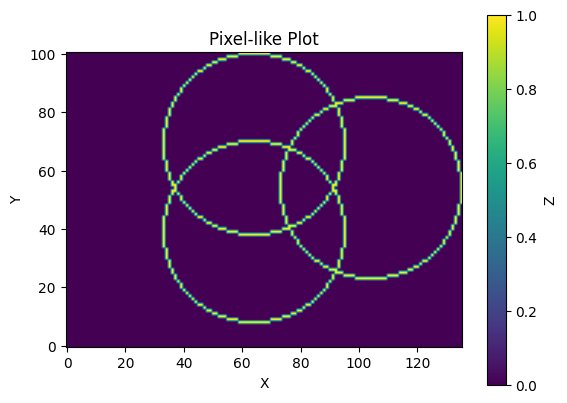

In [21]:
from math import sqrt


namespace = {}

def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1

def draw_reuleaux_triangle(centre_x, centre_y, length): 
    height = round(sqrt(3) / 2 * length)
    x = centre_x
    y = centre_y + height
    yield from (draw_circle(x, y, length))
    x = centre_x - (length // 2)
    y = centre_y - (height // 2)
    yield from (draw_circle(x, y, length))
    x = centre_x + (length // 2)
    y = centre_y - (height // 2)
    yield from (draw_circle(x, y, length))

for _ in range(3):     
    x, y, radius = random.randint(30, 100), random.randint(30, 100), random.randint(30, 50)
    print(f"x: {x}, y: {y}, radius: {radius}")
    print(list(draw_reuleaux_triangle(x, y, radius)))
    make_visual(draw_reuleaux_triangle(x, y, radius))